# CSE351 HW1
Name: Yuqing Wang
SBU ID: 113923920


In [1]:
# all packages I will used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use method in packet pandas to load the csv file about the New York City Airbnb Open Data.
data = pd.read_csv('/Users/miku/AB_NYC_2019.csv')

## Task 1 Clean the data
Before we clean the dataset, we need first observe the data and understand it. It will help us to know what data should be clean and better formatting.

In [3]:
# Show some statistics information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The information above tells us that there are 48895 observations and 16 factors in this dataset. We also acquire that the data type of each factor.

In [4]:
# We observe first five rows in this data set.
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


From first five rows, we could easily find that there are some NaN value in the dataset which are our next goal to handle those missing values.

### 1-1 Missing values

In [5]:
# show the number of missing value in each column in desending order.
data.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the output above we could find that the 'last_review' and 'reviews_per_month' get the most missing value. The last review indicates the date time of the latest time that a user reviews the website. There are also 21 missing values in the 'host_name' factor. But we could simply remove these two factors from our dataset because they are irrelevant and insignificant in our case. For the factor 'reviews_per_month', there are a lot of missing values but almost all of those values are missed because the value of reviews is 0. It is natural that the number of reviews per month is also 0. So, we need to impute the missing value in this column with 0. For the 16 missing values in the factor 'name', we could just use ' ' to replace the NaN. This is because we need reserve this factor to draw the word cloud of the name, but we do not want other replaced word to influence the original result of the word cloud.

In [6]:
# drop 'host_name' and 'last_review'
data.drop(['host_name','last_review'], axis=1, inplace=True)
# examing changes
data.head(3)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [7]:
# replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)
# examing changes
data.reviews_per_month.isnull().sum()

0

In [8]:
# replacing all NaN values in 'name' with ' '
data.fillna({'name':' '}, inplace=True)
# examing changes
data.name.isnull().sum()

0

### 1-2 Duplicate entries
The duplicate entries should be drop. In this case, there is not duplicate entry.

In [9]:
data.duplicated().sum()

0

The output above indicates that there are no duplicate entry in this dataset. Hence, we could keep to handle outliers.

### 1-3 Outliers
In this dataset, price is an important factor when concerning a room on Airbnb. So I draw the distribution of the price factor to check if there are outliers.

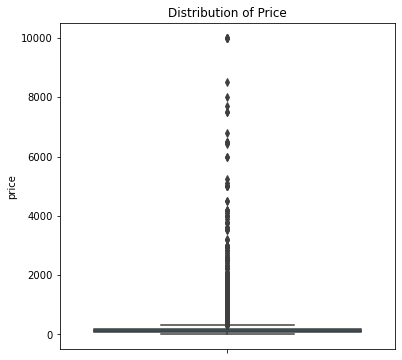

In [10]:
# show the distribution of price to check if there are outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=data['price'])
plt.title("Distribution of Price before dropping outliers")
plt.show()

From the figure 'Distribution of Price', It shows that most of the price of rooms are under $2,000. However, there are several room with a price up to $10,000. It is obvious that there are a lot of outliers need to be dropped. So, I determined that the prices higher than 95% and lower than 5% are outliers.

In [11]:
# the highest thresold
max_thresold = data['price'].quantile(0.95)
# the lowest thresold
min_thresold = data['price'].quantile(0.05)
# only keep the data with price between the highest thresold and lowest thresold
data = data[(data['price']<max_thresold) & (data['price']>min_thresold)]

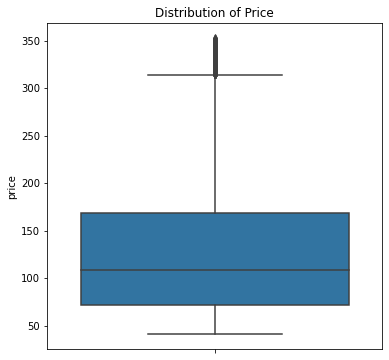

In [12]:
# figure of the distribution of price with data after dropping outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=data['price'])
plt.title("Distribution of Price after dropping outliers")
plt.show()

From the figure 'Distribution of Price after dropping outliers', we could find that most of room at Airbnb are between $70 to $170. There are still some outliers displaying on the figure but they are acceptable.

## task 2 Price and Neighborhood

### 2-a Top 5 and Bottom 5 Neighborhood

In [51]:
# count is the frequency of each neighbourhood
counts = data['neighbourhood'].value_counts()
# we only want the records with the neighborhoods with more than 5 listings.
task2 = data[~data['neighbourhood'].isin(counts[counts<5].index)]
counts

Williamsburg          3716
Bedford-Stuyvesant    3296
Harlem                2483
Bushwick              2112
Upper West Side       1790
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Westerleigh              1
Name: neighbourhood, Length: 219, dtype: int64

This output indicates that Williamburg has the most Airbnb records, which has 3716 records. And there are also many neighborhood only have one record.

In [47]:
# I grouped rooms according to the neighborhood in which they were located and ranked them according to the average of the prices of houses in that neighborhood.
a = task2.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False).head(5)
a = a.reset_index()
a

,neighbourhood,price
0,Tribeca,221.95
1,NoHo,217.38
2,Flatiron District,199.05
3,West Village,197.53
4,Midtown,190.40


This table shows 5 neighborhoods with highest average price Airbnbs.

In [48]:
# bottom 5 neighborhood based on the price of the Airbnb in that neighborhood
b = task2.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False).tail(5)
b = a.reset_index()
b

,index,neighbourhood,price
0,0,Tribeca,221.95
1,1,NoHo,217.38
2,2,Flatiron District,199.05
3,3,West Village,197.53
4,4,Midtown,190.40


This table shows 5 neighborhoods with lowest average Airbnb price.

### 2-b Price and Neighborhood groups

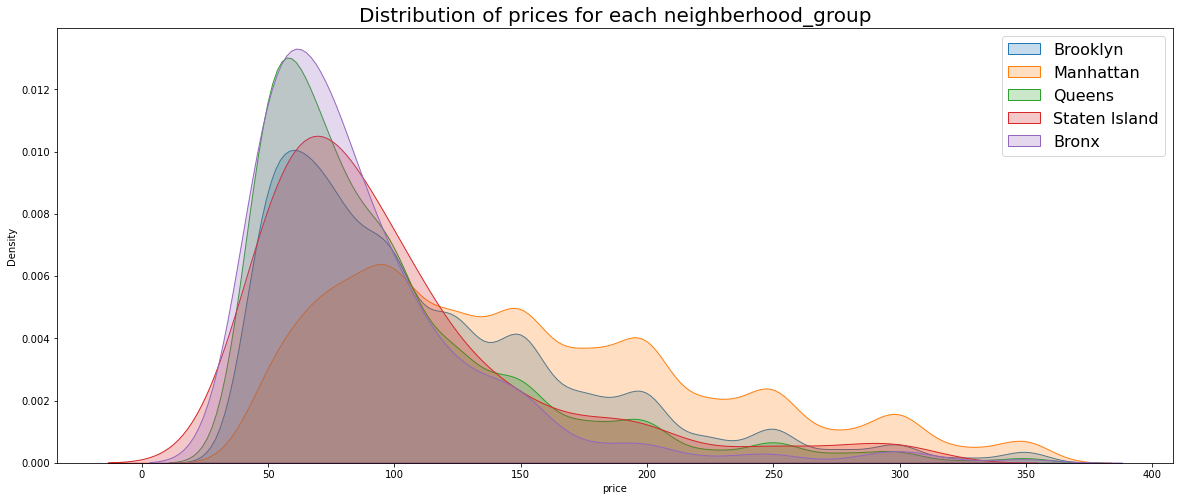

In [15]:
# I grouped the Airbnb by their different neighbourhood group.
sub_1=data.loc[data['neighbourhood_group'] == 'Brooklyn']
sub_2=data.loc[data['neighbourhood_group'] == 'Manhattan']
sub_3=data.loc[data['neighbourhood_group'] == 'Queens']
sub_4=data.loc[data['neighbourhood_group'] == 'Staten Island']
sub_5=data.loc[data['neighbourhood_group'] == 'Bronx']

# price_subx is the price variable for each neighborhood group
price_sub1=sub_1['price'] #Brooklyn
price_sub2=sub_2['price'] #Manhattan
price_sub3=sub_3['price'] #Queens
price_sub4=sub_4['price'] #Staten Island
price_sub5=sub_5['price'] #Bronx

# draw a plot to show the distribution of price for each neighborhood
plt.figure(figsize=(20,8))
sns.kdeplot(price_sub1[price_sub1<500],shade=True,label='Brooklyn')
sns.kdeplot(price_sub2[price_sub2<500],shade=True,label='Manhattan')
sns.kdeplot(price_sub3[price_sub3<500],shade=True,label='Queens')
sns.kdeplot(price_sub4[price_sub4<500],shade=True,label='Staten Island')
sns.kdeplot(price_sub5[price_sub5<500],shade=True,label='Bronx')
plt.title('Distribution of prices for each neighborhood_group',size=20)
plt.legend(prop={'size':16})

Text(0, 0.5, 'Price')

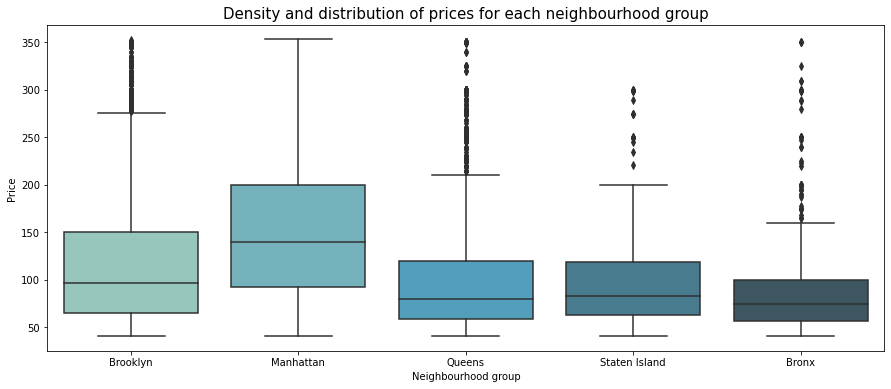

In [16]:
# Draw box plot for the density and distribution of prices for each neighborhood group
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighborhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

From two figures above, we can find that the Airbnb price above $150 is the highest density in Manhattan, while the density of Airbnb below ¥150 are all lower than the other four neighborhood groups. This means that Manhattan has Airbnb at all price points, and overall is higher than the other neighborhood groups. Brooklyn has cheaper rooms than Manhattan, but still higher than the other three groups, and the Bronx has the most rooms around $50 and the fewest rooms in the higher price range of the five neighborhood groups. For Queens and Staten Island, Queens has more rooms in the $50 price range, but both neighborhood groups have almost the same number of high-priced rooms.

## task 3 Pearson correlation

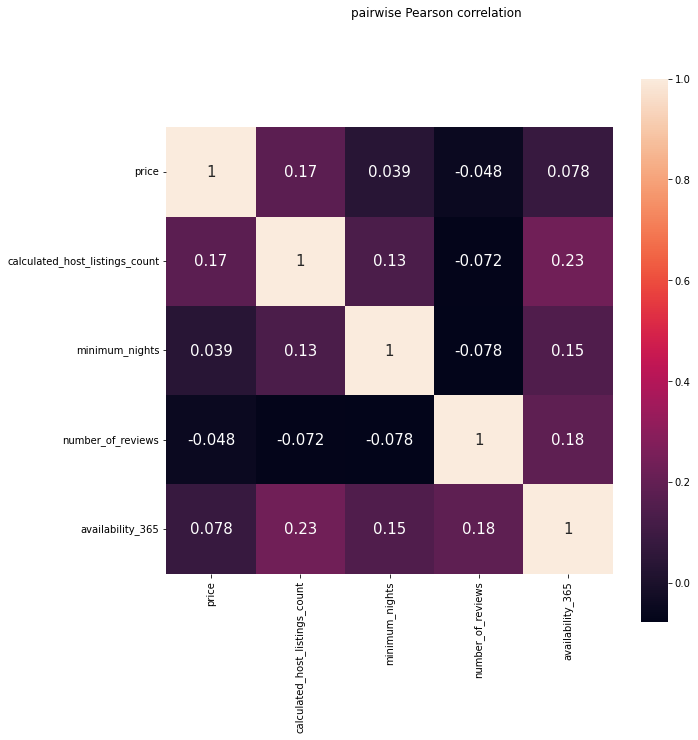

In [53]:
# get the pearson correlation between the several numeric variables
df_corr = data[['price', 'calculated_host_listings_count','minimum_nights', 'number_of_reviews','availability_365']].corr()

# draw the heatmap of the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 15}, square=True)
plt.suptitle('pairwise Pearson correlation')
plt.show()

From the heatmap of the Pearson correlation, we could find that the availability_365 and price have the most positive correlation. It means that the higher the price is, the more days could the Airbnb is avilable in a year. The most negative correlation is between number of reviews and the minimum nights. It shows that the more reviews an Airbnb has, the higher the minimum nights is.

## task 4 Distribution in Map
### 4-a location and neighborhood groups

Text(0.5, 1.0, 'Distribution in Map')

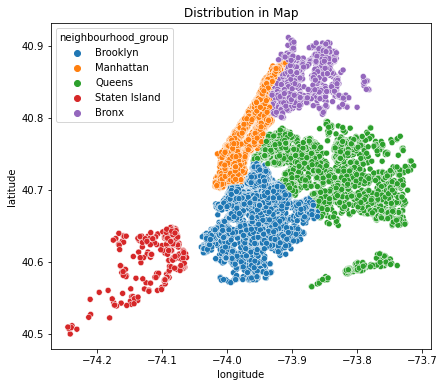

In [18]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
# draw a scatter plot to show the Airbnbs' distribution in map with different color to indicate differen neighbourhood group
sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['neighbourhood_group'], ax=ax1)
ax1.set_title('Distribution in Map')

From the figure to show the distribution of Airbnb above, we could clearly to find the location of different neighborhood.

Text(0.5, 1.0, 'Distribution in Map')

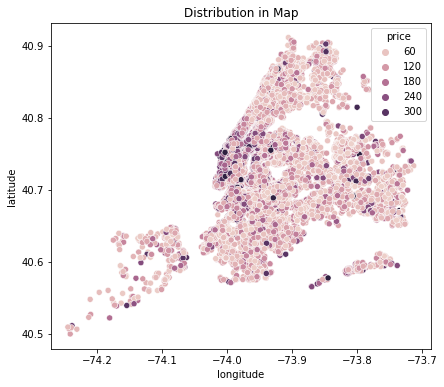

In [19]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
# draw a scatter plot to show the Airbnbs' distribution in map with different color to indicate the level of price
sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['price'], ax=ax1)
ax1.set_title('Distribution in Map')

From the figure above, we could easily find that the Airbnbs with higher price and the Airbnbs with lower price.

### task 5 Word Cloud

In [20]:
# import the package we will need to draw a world cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

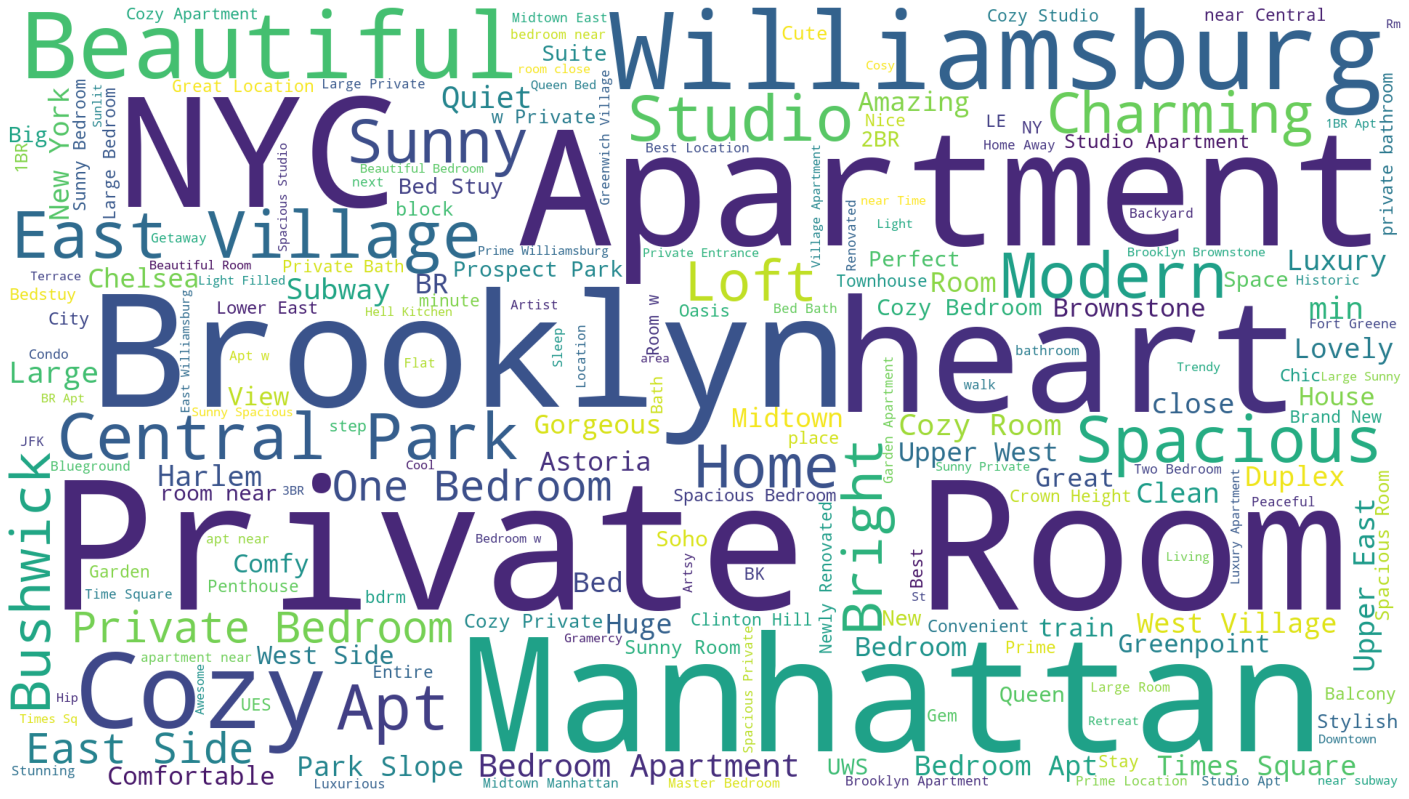

In [21]:
# draw word cloud use the words in the factor 'name'
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('nyc_airbnb.png')
plt.show()

From the word cloud above, we could easily find the words with highest frequency. The most frequency word is 'Private Room', 'Manhattan', 'Brooklyn' and 'Apartment'. These words may be used often because they are more appealing.

## task 6 busiest area

In [22]:
# count the number of listings each host id in the cleaned dataset
busy_host=data.host_id.value_counts().head(10)

In [23]:
# create a data frame with host id and the number that how many listings do they have
busy_host_df=pd.DataFrame(busy_host)
busy_host_df.reset_index(inplace=True)
busy_host_df.rename(columns={'index':'Host_ID', 'host_id':'Listing_num'}, inplace=True)
busy_host_df

,Host_ID,Listing_num
0,219517861,272
1,107434423,195
2,30283594,98
3,12243051,95
4,16098958,91
5,61391963,91
6,22541573,87
7,137358866,54
8,1475015,52
9,7503643,52


Text(0.5, 0, 'Host_id')

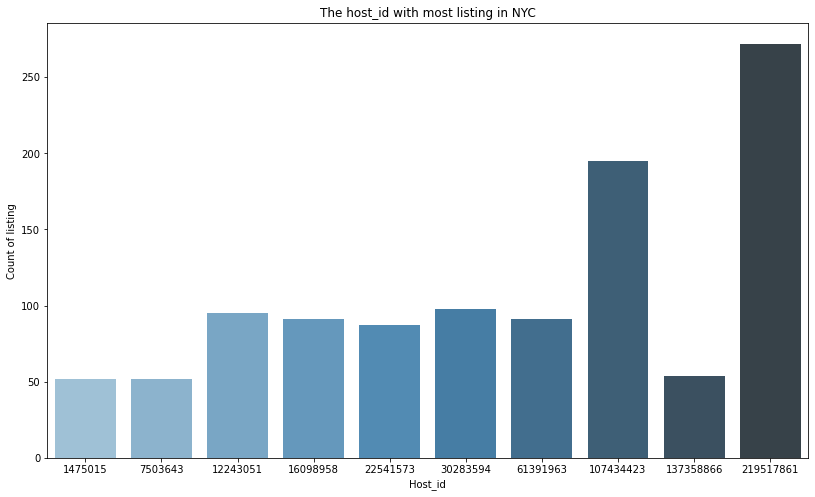

In [24]:
# draw a bar plot to show the top 10 host with most listings in NYC
fig = plt.figure(figsize=(30,8))
ax3 = fig.add_subplot(121)
sns.barplot(x="Host_ID", y="Listing_num", data=busy_host_df,
                 palette='Blues_d')
ax3.set_title('The host_id with most listing in NYC')
ax3.set_ylabel('Count of listing')
ax3.set_xlabel('Host_id')

From the table and figure contain the information about the host with most listings in NYC, we could know the host with the most listing in NYC has 272 Airbnbs.

## task 7 Others
### 7-1 location and room type
In this case, I draw a scatterplot of the distribution of Airbnbs in the map and use different colors to distinguish different room types. From the scatter plot below, I find that most of Airbnbs are private room or entire room. There are extremely less shared Airbnbs showed on the figure. It might because most people prefer to live in a private space. A private room or a entire apartment guarantees this requirement. So, there are less shared rooms showed on the map.

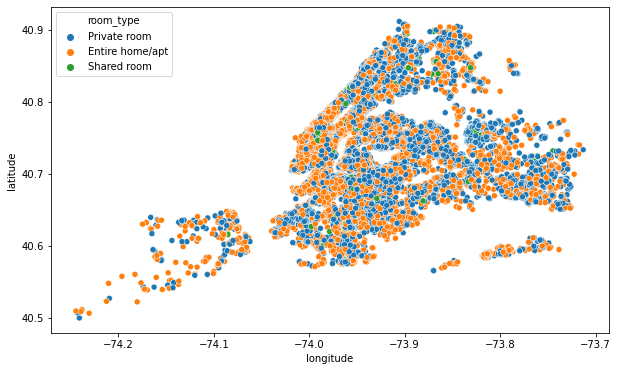

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.room_type)
plt.ioff()

### 7-2
Then  I was curious if the shared room with low demand and low supply had a lower price. Because people usually don't want to rent share a room with strangers. And they may compromise because of the low price. I think individual rooms are usually cheaper than the whole house because they are smaller in size. So I try to draw a box plot the check if my assumptions are right.

Text(0, 0.5, 'Price')

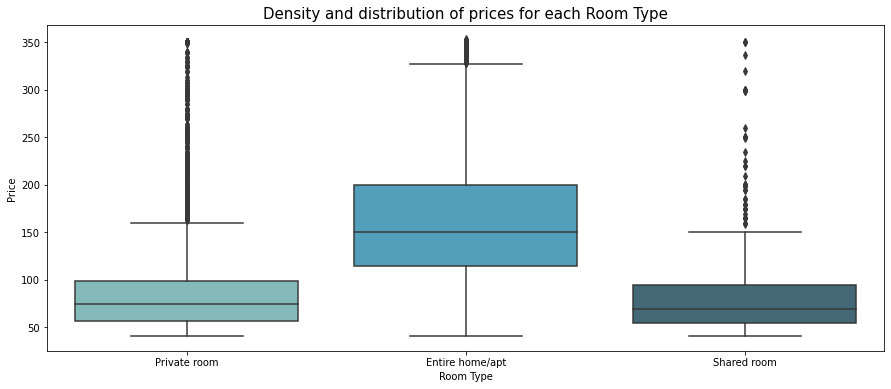

In [26]:
plt.figure(figsize=(15,6))
# draw box plot of the distribution of price for each room type
sns.boxplot(data=data, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")

With the box diagram I drew, I found that the shared room is indeed the least expensive of the three room types, but it is only a little bit lower than the private room. The whole house is really the most expensive as I guessed at the beginning. But what I didn't expect at first was that the range of prices for the whole house was also the largest. The lowest values for the three room types were actually close to the same.